In [1]:
import numpy as np
import pandas as pd
from sklearn import *
import warnings; warnings.filterwarnings("ignore")

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/sample_submission.csv')
train.shape, test.shape, sub.shape

((262144, 258), (131073, 257), (131073, 2))

Wordplay in Column Names
==============================

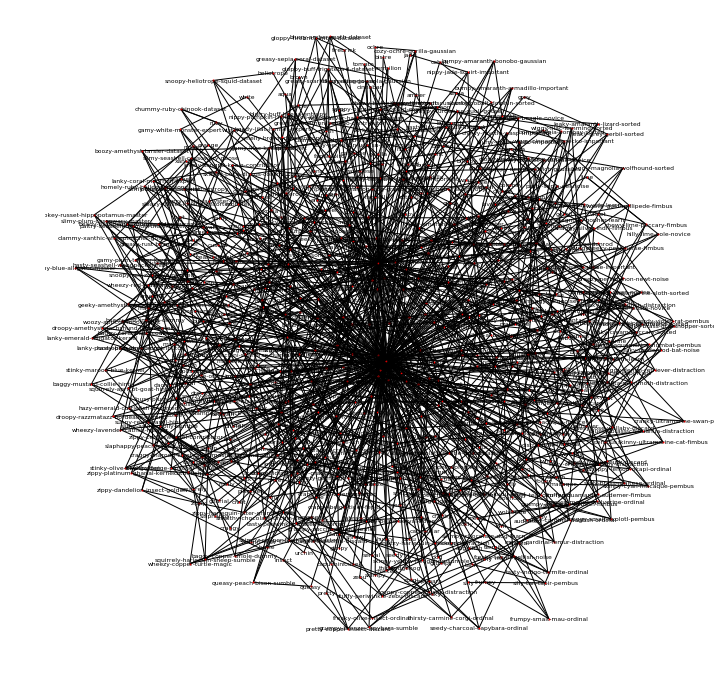

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()

col = [c for c in train.columns if c not in ['id', 'target']]

G.add_node('Start')
for i in range(4):
    G.add_node('Column Section '+ str(i))
    G.add_edge('Start','Column Section '+ str(i))
    for c in train[col].columns:
        if c.split('-')[i] not in G.nodes():
            G.add_node(c.split('-')[i])
            G.add_edge('Column Section '+ str(i), c.split('-')[i])
        if c not in G.nodes():
            G.add_node(c)
        G.add_edge(c.split('-')[i],c)
plt.figure(1,figsize=(12,12))
nx.draw_networkx(G, node_size=1,font_size=6)
plt.axis('off'); plt.show()

How unique are the column values
==========

In [3]:
df = []
for c in train.columns:
    if c not in ['target', 'id', 'wheezy-copper-turtle-magic']:
        l1 = test[c].unique()
        l2 = train[c].unique()
        df.append([c, len(l1), len(l2), len(l1)- 131073, len(l2) - 262144])
df = pd.DataFrame(df, columns=['col', 'test_unique', 'train_unique', 'test_diff', 'train_diff'])
for c in ['test_unique', 'train_unique', 'test_diff', 'train_diff']:
    print(df[c].min(), df[c].max())
    
#col = list(df[((df['test_diff']<-1900) & (df['train_diff']<-7500))]['col'].values)
df.head()

128997 129262
253919 255057
-2076 -1811
-8225 -7087


,col,test_unique,train_unique,test_diff,train_diff
0,muggy-smalt-axolotl-pembus,129044,254322,-2029,-7822
1,dorky-peach-sheepdog-ordinal,129165,254588,-1908,-7556
2,slimy-seashell-cassowary-goose,129104,254356,-1969,-7788
3,snazzy-harlequin-chicken-distraction,129228,254576,-1845,-7568
4,frumpy-smalt-mau-ordinal,129060,254330,-2013,-7814


Getting wheezy
=====

In [4]:
col = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

df_all = pd.concat((train,test), axis=0, ignore_index=True).reset_index(drop=True)
df_all['wheezy-copper-turtle-magic'] = df_all['wheezy-copper-turtle-magic'].astype('category')

train = df_all[:train.shape[0]].reset_index(drop=True)
test = df_all[train.shape[0]:].reset_index(drop=True)
del df_all
train.shape, test.shape

((262144, 258), (131073, 258))

Lets Race
======

In [5]:
test_ = []

kn = neighbors.KNeighborsClassifier(n_neighbors=17, p=2.9)
sv = svm.NuSVC(kernel='poly', degree=4, random_state=4, probability=True, coef0=0.08)

for s in sorted(train['wheezy-copper-turtle-magic'].unique()):
    train2 = train[train['wheezy-copper-turtle-magic']==s].reset_index(drop=True).copy()
    test2 = test[test['wheezy-copper-turtle-magic']==s].reset_index(drop=True).copy()
    kn.fit(train2[col], train2['target'])
    sv.fit(train2[col], train2['target'])
    test2['target'] = (kn.predict_proba(test2[col])[:,1] * 0.2) + (sv.predict_proba(test2[col])[:,1] * 0.8)
    test_.append(test2)

test_ = pd.concat(test_).reset_index(drop=True)
test_[['id','target']].to_csv("submission.csv", index=False)